# Problem Sheet 2
## Name: Keertana V. Chidambaram (12211266)

## Imputing age and gender

For this exercise, we impute age and gender from surv_income to best_income using linear prediction models.

### (a) Proposed strategy for imputing missing values
1. Fit an OLS regression model between x1 = tot_inc, x2 = wgt and y = age in surv_income (model 1). 
2. Fit a logit regression model between x1 = tot_inc, x2 = wgt and y = gender in surv_income (model 2). 
3. Predict age and gender using x1 = tot_inc = lab_inc + cap_inc, x2 = wgt in model 1 and 2 respectively in best_income dataset.

#### Preliminary data analysis and preparation:

In [3]:
#Importing necessary packages
import pandas as pd
import numpy as np
import csv
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading data files
surv_income = pd.read_csv('SurvIncome.txt', sep=",", header=None)
surv_income.columns = ["tot_inc", "wgt", "age", "gender"]
best_income = pd.read_csv('BestIncome.txt', sep=",", header=None)
best_income.columns = ["lab_inc", "cap_inc", "hgt", "wgt"]

count    10000.000000
mean       150.006011
std          9.973001
min        114.510700
25%        143.341979
50%        149.947641
75%        156.724586
max        185.408280
Name: wgt, dtype: float64

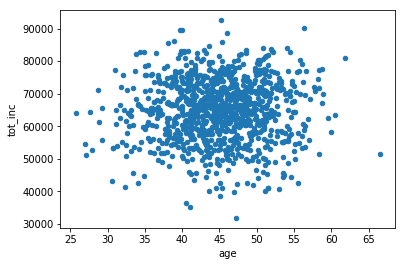

In [5]:
#Preliminary checks plus variable definitions
best_income.head()
surv_income.head()
surv_income.shape
best_income.shape

best_income["tot_inc"] = best_income["lab_inc"] + best_income["cap_inc"]
best_income.head()

age = surv_income['age']
tot_inc = surv_income['tot_inc']
surv_income.plot(x='age', y='tot_inc', kind='scatter')

surv_income['tot_inc'].describe()
surv_income['wgt'].describe()
surv_income['age'].describe()
surv_income['gender'].describe()

best_income['tot_inc'].describe()
best_income['wgt'].describe()

In [6]:
#Preparing data for predictive model building
outcome1 = ['age']
outcome2 = ['gender']
features = ['tot_inc', 'wgt']

In [7]:
y1 = surv_income[outcome1]
y2 = surv_income[outcome2]

x = surv_income[features]
x = sm.add_constant(x, prepend=False)
x.head()

,tot_inc,wgt,const
0,63642.513655,134.998269,1.0
1,49177.380692,134.392957,1.0
2,67833.339128,126.482992,1.0
3,62962.266217,128.038121,1.0
4,58716.952597,126.211980,1.0


### (b) Running regression models and imputing variables:

In [8]:
#Model 1 for age prediction
m1 = sm.OLS(y1, x)
res1 = m1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.531
Time:                        01:31:13   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc      2.52e-05   2.26e-05      1.114      0.2

In [9]:
#Model 2 for gender prediction
m2 = sm.Logit(y2, x)
res2 = m2.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        01:31:14   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc       -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

__Note: From the R-sq values we can infer that Model 1 is not significant, whereas Model 2 is significant. 
Ideally for Model 1, we need to obtain other features that might be better predictors of age (e.g. years of industry experience) and then obtain a significant model with the new features. But in this exercise, we proceed as if both the models were significant and make predictions accordingly.__

In [10]:
#Imputing values for age and gender using the newly defined prediction functions
best_income['constant'] = 1
best_income['age'] = res1.predict(best_income[['tot_inc', 'wgt', 'constant']])
best_income['gender'] = res2.predict(best_income[['tot_inc', 'wgt', 'constant']])
best_income['gender'] = (best_income['gender'] >= 0.5) * 1

best_income = best_income.drop(columns=['tot_inc', 'constant'])
best_income.head()

,lab_inc,cap_inc,hgt,wgt,age,gender
0,52655.605507,9279.509829,64.568138,152.920634,44.742614,0
1,70586.979225,9451.016902,65.727648,159.534414,45.154387,0
2,53738.008339,8078.132315,66.268796,152.502405,44.742427,0
3,55128.180903,12692.670403,62.910559,149.218189,44.915836,0
4,44482.794867,9812.975746,68.678295,152.726358,44.551391,1


### (c) Descriptive statistics for imputed age and gender

In [11]:
best_income['age'].describe()

count    10000.000000
mean        44.890828
std          0.219150
min         43.976495
25%         44.743776
50%         44.886944
75%         45.038991
max         45.703819
Name: age, dtype: float64

In [12]:
best_income['gender'].describe()

count    10000.000000
mean         0.454600
std          0.497959
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

### (d) Correlation matrices for all the six variables in best_income

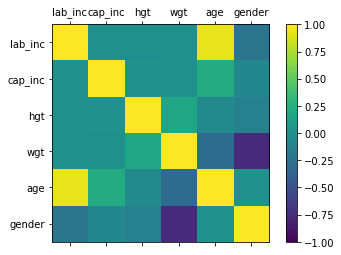

In [13]:
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

corr_plot(best_income)

In [14]:
#In Matrix Form
corr = best_income.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,age,gender
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924053,-0.215469
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234159,-0.0625691
hgt,0.00278978,0.0215716,1,0.172103,-0.0450828,-0.127416
wgt,0.00450691,0.00629868,0.172103,1,-0.300288,-0.763821
age,0.924053,0.234159,-0.0450828,-0.300288,1,0.0200595
gender,-0.215469,-0.0625691,-0.127416,-0.763821,0.0200595,1


## Stationarity and data drift 

### (a) OLS regression and coefficient reporting

In [16]:
#Importing necessary packages
import pandas as pd
import numpy as np
import csv
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [18]:
#Reading data files
income_intel = pd.read_csv('IncomeIntel.txt', sep=",", header=None)
income_intel.columns = ["grad_year", "gre_qnt", "salary_p4"]

#Some primary checks on data
income_intel['grad_year'].describe()
income_intel['gre_qnt'].describe()
income_intel['salary_p4'].describe()

#Converting old GRE scores to new GRE scores
for i, j  in enumerate(income_intel['gre_qnt']):
    if j >= 200:
        income_intel['gre_qnt'][i] = 130 + (j - 200)/(800 - 200) * 40

income_intel['gre_qnt'].describe()
income_intel.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,165.982471,67400.475185
1,2001.0,164.787445,67600.584142
2,2001.0,165.751861,58704.880589
3,2001.0,168.033232,64707.290345
4,2001.0,165.666857,51737.324165


In [19]:
#Model 1 OLS between salary and GRE scores
outcome = ['salary_p4']
features = ['gre_qnt','constant']
income_intel['constant'] = 1

y = income_intel[outcome]
x = income_intel[features]

m = sm.OLS(y, x)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           2.97e-48
Time:                        01:32:24   Log-Likelihood:                -10719.
No. Observations:                1000   AIC:                         2.144e+04
Df Residuals:                     998   BIC:                         2.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt    -1027.5549     66.659    -15.415      0.0

Coefficient estimation and corresponding standard errors:

$$ \beta_0 = 2.415 * 10^5$$   
$$ Std Err(\beta_0) = 66.659$$

$$ \beta_1 = -1027.5549$$   
$$ Std Err(\beta_1) =  1.09 * 10^4$$

__From the results we see that the relationship and the model are significant and GRE scores adversely affect the salary of the person (because of the -ve coefficient), which is counterintuitive to our research hypthesis that they are positively correlated.__

### (b) GRE quantitative score vs. graduation year scatter plot

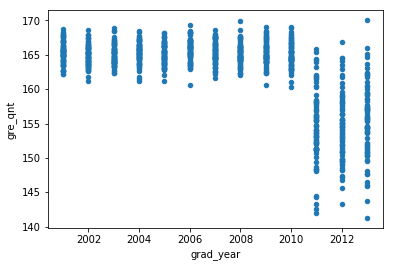

In [20]:
gre_qnt = income_intel['gre_qnt']
salary_p4 = income_intel['salary_p4']
grad_year = income_intel['grad_year']

income_intel.plot(x='grad_year', y='gre_qnt', kind='scatter')

Here, we notice that the variance for gre_qnt is more or less the same from 2001 to 2010 and from 2011 to 2013.
But there is a noticable variation of variance from the first set (2001-10) to the second (2011 to 13).
This arises because of the system drift caused due to change in format of the GRE exam.
This can cause the problem of heteroskedascity while performing the OLS regression. 
To avoid this problem, we standardize the distributions and use their z-values. 
(Note: the z value is a proxy for the relative position of the person w.r.t all the other candidates who took GRE in the sasm year)

In [21]:
#Standardizing gre_qnt values
income_intel2 = []
income_intel2 = pd.DataFrame([], columns=["constant", "grad_year", "gre_qnt", "salary_p4"])
#income_intel.columns = [''] * len(income_intel.columns)

for i in range(2001,2014):
    temp = income_intel.loc[income_intel['grad_year'] == i]
    temp['std_gre_qnt'] = (stats.zscore(temp['gre_qnt']))
    income_intel2 = income_intel2.append(temp)
income_intel = income_intel2
print(income_intel.head())

  constant  grad_year     gre_qnt     salary_p4  std_gre_qnt
0        1     2001.0  165.982471  67400.475185     0.409407
1        1     2001.0  164.787445  67600.584142    -0.358973
2        1     2001.0  165.751861  58704.880589     0.261128
3        1     2001.0  168.033232  64707.290345     1.728008
4        1     2001.0  165.666857  51737.324165     0.206473


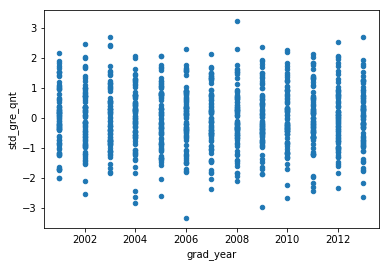

In [22]:
std_gre_qnt = income_intel['std_gre_qnt']
salary_p4 = income_intel['salary_p4']
grad_year = income_intel['grad_year']

income_intel.plot(x='grad_year', y='std_gre_qnt', kind='scatter')

__Note: now we have uniform variance and heteroskedasticity has been eliminated!__

### (c) Income vs. graduation year scatter plot

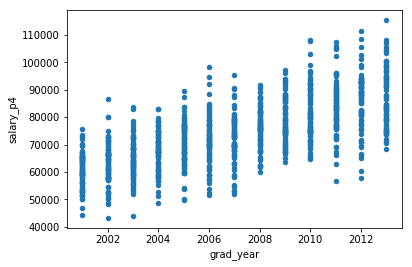

In [23]:
income_intel.plot(x='grad_year', y='salary_p4', kind='scatter')

__Note: Here, the mean of the data slowly shifts w.r.t time, therefore we have the stationarity problem! Solution is to detrend the data w.r.t time__

In [24]:
#De-trending the salary data
'''
Divide each salary by (1 + avg_growth_rate) ** (grad_year - 2001). This means that all grad_year=2001 salaries will not change. 
All grad_year=2003 salaries will be divided by (1 + avg_growth_rate) ** 2. 
And all grad_year=2013 salaries will be divided by (1 + avg_growth_rate) ** 12.
'''
avg_inc_by_year = income_intel['salary_p4'].groupby(income_intel['grad_year']).mean().values
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

def std_salary(row):
    salary, grad_year = row
    salary = salary / ((1 + avg_growth_rate) ** (grad_year - 2001)) 
    return salary
income_intel['std_salary_p4'] = income_intel[['salary_p4', 'grad_year']].apply(std_salary, axis=1)

print(income_intel.head())

  constant  grad_year     gre_qnt     salary_p4  std_gre_qnt  std_salary_p4
0        1     2001.0  165.982471  67400.475185     0.409407   67400.475185
1        1     2001.0  164.787445  67600.584142    -0.358973   67600.584142
2        1     2001.0  165.751861  58704.880589     0.261128   58704.880589
3        1     2001.0  168.033232  64707.290345     1.728008   64707.290345
4        1     2001.0  165.666857  51737.324165     0.206473   51737.324165


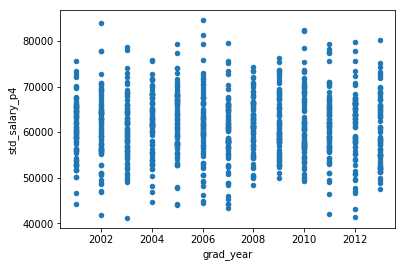

In [25]:
std_salary_p4 = income_intel['std_salary_p4']
income_intel.plot(x='grad_year', y='std_salary_p4', kind='scatter')

__Note: Now the drift of the salary data with time has also been treated. We can proceed to rerun the regression model.__

### (d) Re-estimate coefficients with updated variables.

In [26]:
#Model 2 rerun of OLS between salary and GRE scores
outcome = ['std_salary_p4']
features = ['std_gre_qnt','constant']
income_intel['constant'] = 1

y = income_intel[outcome]
x = income_intel[features]

m = sm.OLS(y, x)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          std_salary_p4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4395
Date:                Wed, 17 Oct 2018   Prob (F-statistic):              0.508
Time:                        01:35:13   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
std_gre_qnt  -149.6290    225.711     -0.663      

We find that the r-sqared value of the result has dropped to 0 and p-value of the new GRE score on prediction of the new salary is 0.508 (>0.05). Hence we see that GRE scores do not affect the salary of a person. The corresponding estimated coefficients are:

$$ \beta_0 = 6.142 * 10^4$$   
$$ Std Err(\beta_0) = 225.771$$

$$ \beta_1 = -149.629$$   
$$ Std Err(\beta_1) =  225.771$$

Here, the coefficients are still negative as before, but the standard error is also very big, and neither the model nor any of its coefficients are  significant. The reason behind this is because, previously, the overall trend of GRE scores were to decrease over time because of the system drift, and salaries to increase over time, because of non-stationarity w.r.t time. The model interpreted the data as that salary and GRE scores were negatively correlated because of the drift. Once our data is drift-free, we observe that the model is not relevant. Therefore, we can conclude that GRE scores have no effect on salary of a person 4 years after graduation! So we have evidence that our alternate hypothesis (no effect hypothesis) is true, or that our hypothesis is false.

## Assessment of Kossinets and Watts (2009)

In this paper, the authors try to understand the mechanism behind the origins of homophily. They ask the research question: _how does choice homophily and induced homophily contribute to the overall pattern of homophily?_ 


The data used in the analysis was based on a directory of 30,396 people affiliated with a large university (undergraduate, graduate and professional students, faculty members, staff and administrators, and affiliates). Three different datasets for these 30,396 people were merged together to capture their attributes, affiliations, and interactions: (1) log of the university e-mail interactions (7,156,162 observations), (2) attribute database of individuals (age, department, gender etc.) (30,396 observations), and (3) record of course registration (30,396 observations). The data was collected over 270 days, i.e. one full academic year. Appendix A on page 439 contains definition and description information for all the variables used in the model. 

There are some flaws that might have been introduced in the study because of the data cleaning/ imputing step undertaken by the authors. Firstly, the dataset used for the study contained missing and conflicting data. The authors used various imputation methods such as modal value substitution and backward/forward interpolation. This may lead to the incorrect prediction of missing/conflicting values. For example, if we were to use modal substitution to predict the missing values for a faculty’s age, the prediction is susceptible to a lot of error because the variation in faculty age tends to be very large. This can lead to poor control for the age attribute while performing the analysis. Secondly, forwarding one message to multiple people was considered not representative of a bond. So, simultaneous messages from the same person to multiple people with difference in size < 100 bytes was excluded from the dataset while cleaning. But the robustness of the model was tested when up to 5 recipient e-mails were treated as interpersonal communication, and it yielded the same result. But the authors could have missed out on relationship information where large forwards could have been a sign of relationship. 

In this study, only the log of the e-mail and characteristics of the sender/ receiver was used to model relationships. There is a weakness in this theoretical construct. This is because the content of the mail would also shed valuable information about the nature and strength of the relationship. For example, sometimes students relay useful information to other students, even if they do not have a social bond between them. Unfortunately, the authors could not get access to the e-mail content. But they highlight that limitation and suggest that access can be made available with the right incentive and usage policy for the e-mails. They also suggest using the contents of the e-mail to perform text analysis and to validate inferred network ties by selectively surveying e-mail. Despite its shortcoming, the paper develops a useful model to understand homophily and sheds some interesting insight into the mechanism of homophily formation.
